# Wonderful Pomegranate analysis
we introduce the following analysis for the POM project that took place during the 2021 season.

In [1]:
#### init notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

sns.set_theme(style="white")
figure_size = (19.2, 10.8)
sns.set(rc={'figure.figsize':(11.7,8.27)})
path_to_csv = "/media/yotam/My Book/ZED DOWNLOADS/chilex/citrus/040422/Oranges LaneLate/Oranges LaneLate_size_distribution.csv"
path_to_gt_csv = ""
#


#### reading data from csv

In [4]:
df = pd.read_csv(path_to_csv)
df = df[df["is_dropped"] == 0]
df = df[df["tracking_generations"] > 1]
df.head(100)


,Unnamed: 0,fruit_type,caliber_in_mm,distance,coord_X,coord_Y,tracking_generations,is_dropped
3,3,pomegranate,74.984,1.125626,858,296,4,0
10,10,pomegranate,81.438,0.725234,780,491,2,0
11,11,pomegranate,140.885,2.252263,675,602,2,0
16,16,pomegranate,79.840,0.998425,395,406,3,0
23,23,pomegranate,71.389,0.695241,572,363,2,0
...,...,...,...,...,...,...,...,...
707,11,pomegranate,65.497,1.129113,378,319,2,0
709,13,pomegranate,115.934,1.533367,490,487,2,0
710,14,citrus,114.813,0.592305,640,508,2,0
711,15,citrus,79.554,0.592305,612,114,2,0


#### EDA

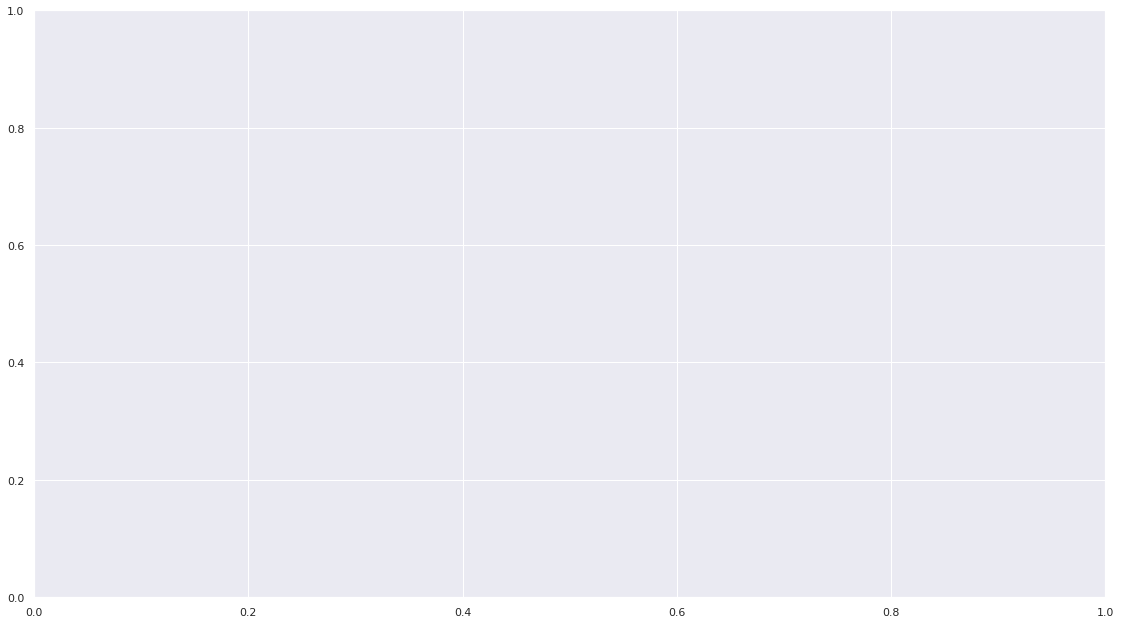

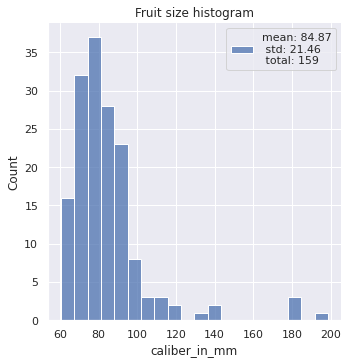

In [5]:
# fruit size hist
# df = df[df["tracking_generations"] ]
fig, ax = plt.subplots(figsize=figure_size)
mean_fruit_size = "{:.2f}".format(df["caliber_in_mm"].mean())
std_fruit_size = "{:.2f}".format(df["caliber_in_mm"].std())
total_count = "{:.0f}".format(df["caliber_in_mm"].count())
sns.displot(df, x="caliber_in_mm", bins=20, label=f"mean: {mean_fruit_size}\n std: {std_fruit_size}\n total: {total_count}")
title = "Fruit size histogram"
plt.title(title);
plt.legend();

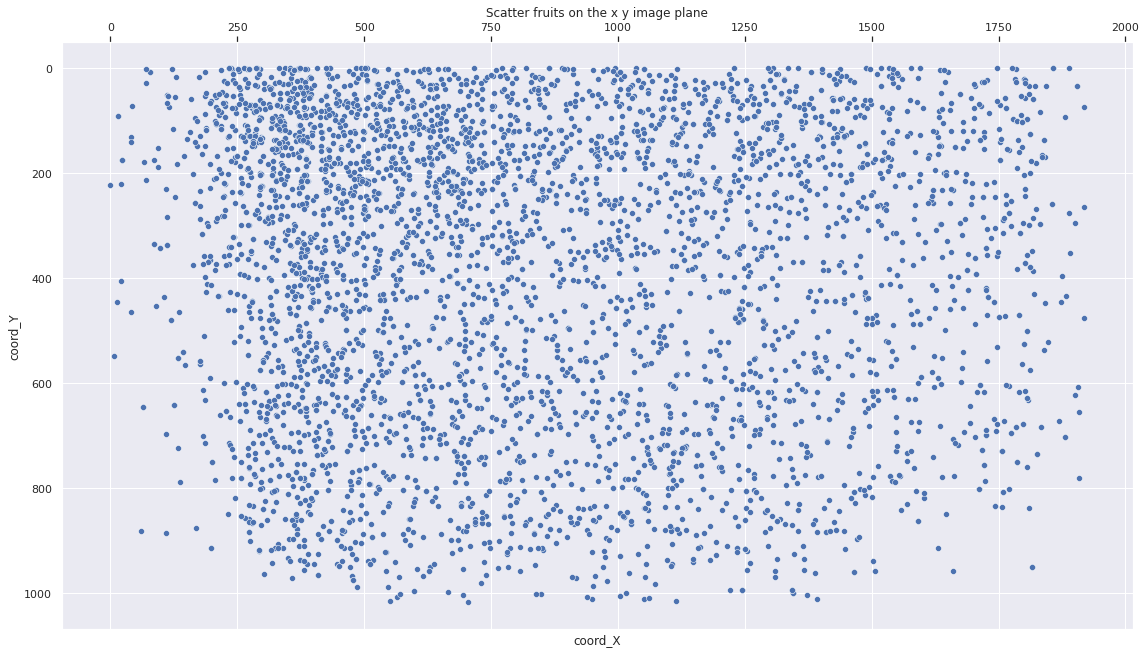

In [6]:
# scatter fruits on x y plane
fig, ax = plt.subplots(figsize=figure_size);
sns.scatterplot(data=df, x="coord_X", y="coord_Y");
title = "Scatter fruits on the x y image plane"
plt.title(title);

ax = plt.gca()  # get the axis
ax.set_ylim(ax.get_ylim()[::-1])  # invert the axis
ax.xaxis.tick_top()  # and move the X-Axis

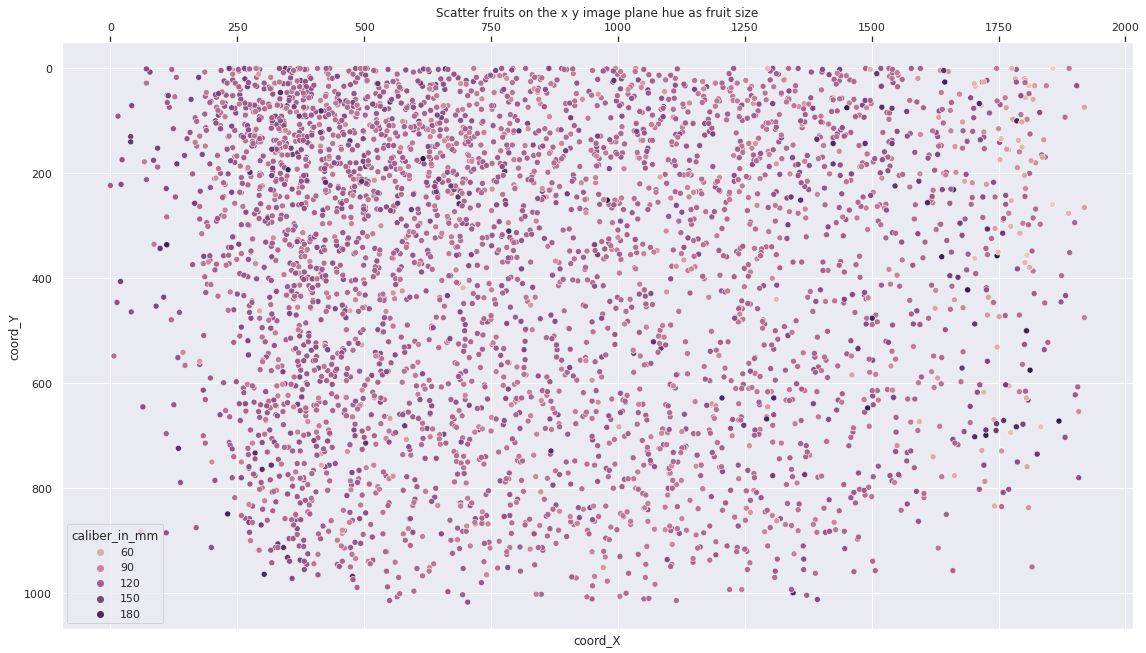

In [7]:
# scatter fruits on x y plane with hue as fruit size
with sns.plotting_context("notebook"):
    fig, ax = plt.subplots(figsize=figure_size);
    sns.scatterplot(data=df, x="coord_X", y="coord_Y", hue="caliber_in_mm");
    title = "Scatter fruits on the x y image plane hue as fruit size"
    plt.title(title);

    ax = plt.gca()  # get the axis
    ax.set_ylim(ax.get_ylim()[::-1])  # invert the axis
    ax.xaxis.tick_top()

In [8]:
df_right_filtered = df[df["coord_X"] > 500]
mean_fruit_size_filtered = "{:.2f}".format(df_right_filtered["caliber_in_mm"].mean())
print(mean_fruit_size)
print(mean_fruit_size_filtered)

114.48
112.09


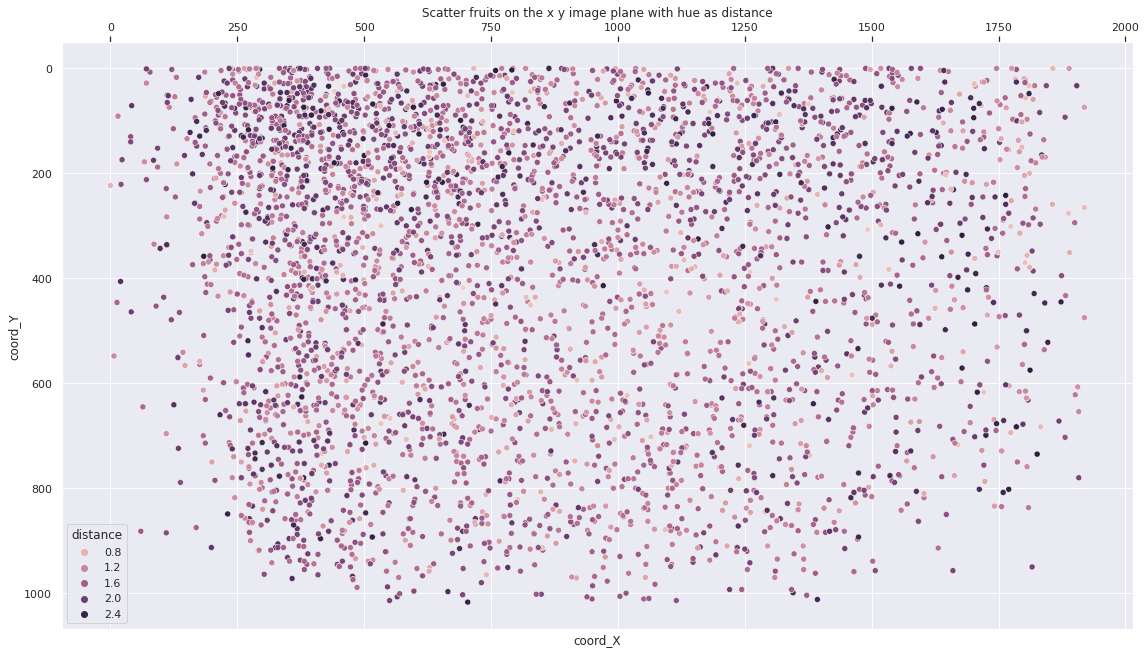

In [9]:
with sns.plotting_context("notebook"):
    # scatter fruits on x y plane with hue as distance
    fig, ax = plt.subplots(figsize=figure_size);
    sns.scatterplot(data=df, x="coord_X", y="coord_Y", hue="distance");
    title = "Scatter fruits on the x y image plane with hue as distance"
    plt.title(title);

    ax = plt.gca()  # get the axis
    ax.set_ylim(ax.get_ylim()[::-1])  # invert the axis
    ax.xaxis.tick_top()

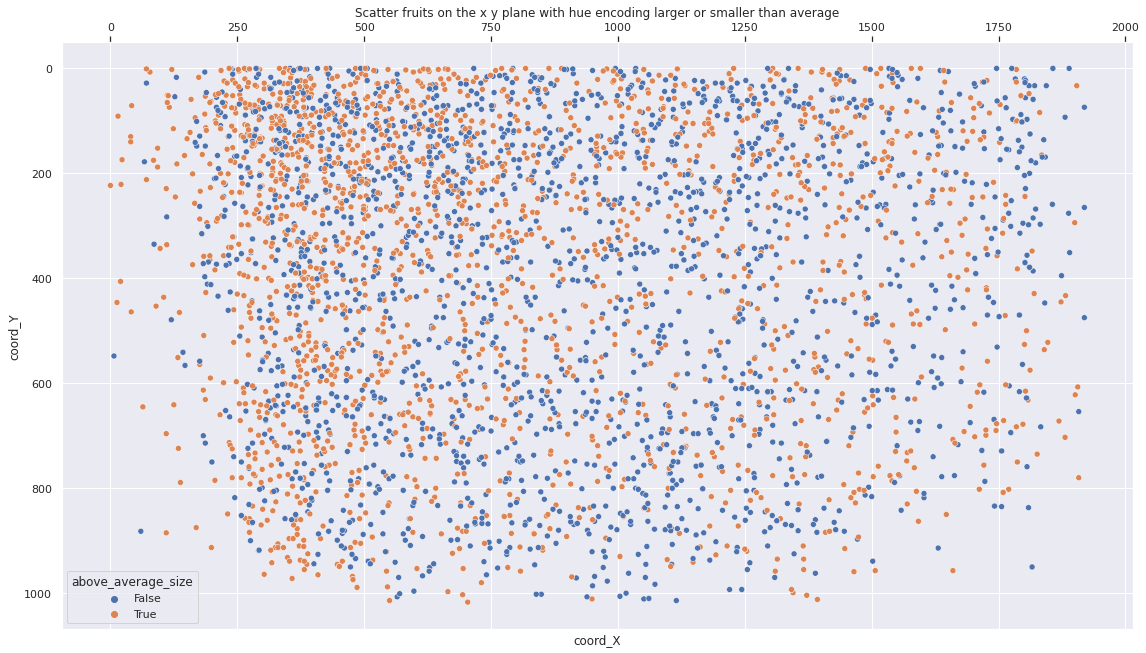

In [10]:
mean_fruit_size = df["caliber_in_mm"].mean()
df["above_average_size"] = df.apply(lambda x: True if x["caliber_in_mm"] > mean_fruit_size else False, axis=1)

fig, ax = plt.subplots(figsize=figure_size);
sns.scatterplot(data=df, x="coord_X", y="coord_Y", hue="above_average_size");
title = "Scatter fruits on the x y plane with hue encoding larger or smaller than average"
plt.title(title);

ax = plt.gca()  # get the axis
ax.set_ylim(ax.get_ylim()[::-1])  # invert the axis
ax.xaxis.tick_top()

/home/yotam/anaconda3/envs/fse/lib/python3.6/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


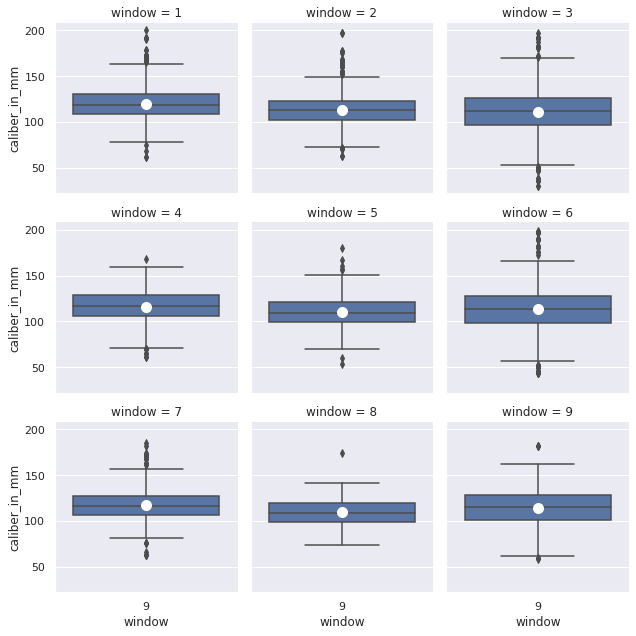

In [11]:
# average size across 3x3 division of the frame
width_size = round(1920/3)
height_size = round(1080/3)
df["window"] = df.apply(lambda x: (x["coord_X"] // width_size) + (x["coord_Y"] // height_size) * 3 + 1, axis=1)
average_size_by_window = df.groupby("window", as_index=False)["caliber_in_mm"].mean()
std_size_by_window = df.groupby("window", as_index=False)["caliber_in_mm"].std()

g = sns.FacetGrid(df, col="window", col_wrap=3, margin_titles=True)
g.map(sns.boxplot, "window", "caliber_in_mm", showmeans=True, meanprops={"marker": "o",
                                                                         "markerfacecolor": "white",
                                                                         "markeredgecolor": "white",
                                                                         "markersize": "10"})





In [17]:
df.head(100)

,Unnamed: 0,fruit_type,caliber_in_mm,distance,coord_X,coord_Y,above_average_size,window
0,0,citrus,72.675,1.267227,512,615,False,4
1,1,citrus,94.171,2.344565,991,673,True,5
2,2,citrus,49.407,1.367244,756,879,False,8
3,3,citrus,61.474,1.718834,791,964,False,8
4,4,citrus,60.599,1.871872,868,1022,False,8
...,...,...,...,...,...,...,...,...
95,95,citrus,69.992,0.678121,399,185,False,1
96,96,citrus,54.978,0.641436,1641,88,False,3
97,97,citrus,72.328,1.704365,86,105,False,1
98,98,citrus,121.227,1.604158,479,673,True,4


/home/yotam/anaconda3/envs/fse/lib/python3.6/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


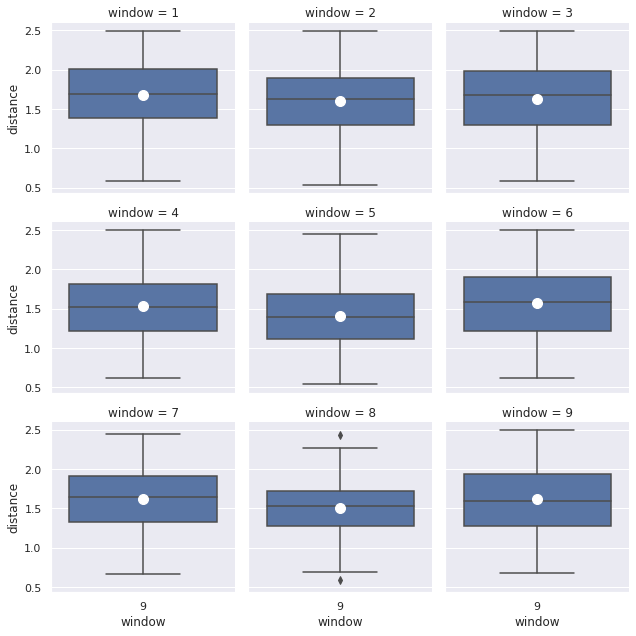

In [12]:
g = sns.FacetGrid(df, col="window", col_wrap=3, margin_titles=True)
g.map(sns.boxplot, "window", "distance", showmeans=True, meanprops={"marker": "o",
                                                                         "markerfacecolor": "white",
                                                                         "markeredgecolor": "white",
                                                                         "markersize": "10"})

In [48]:
g = sns.FacetGrid(df_right_filtered, col="window", col_wrap=3, margin_titles=True)
g.map(sns.boxplot, "window", "caliber_in_mm", showmeans=True, meanprops={"marker": "o",
                                                                         "markerfacecolor": "white",
                                                                         "markeredgecolor": "white",
                                                                         "markersize": "10"})

KeyError: 'window'

/home/yotam/anaconda3/envs/fse/lib/python3.6/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


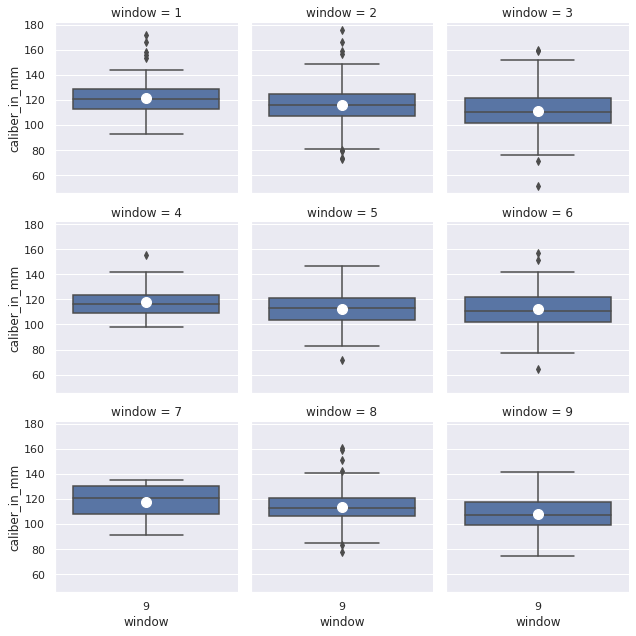

In [49]:
df_left_filtered = df[df["coord_X"] > 500]
g = sns.FacetGrid(df_left_filtered, col="window", col_wrap=3, margin_titles=True)
g.map(sns.boxplot, "window", "caliber_in_mm", showmeans=True, meanprops={"marker": "o",
                                                                         "markerfacecolor": "white",
                                                                         "markeredgecolor": "white",
                                                                         "markersize": "10"})

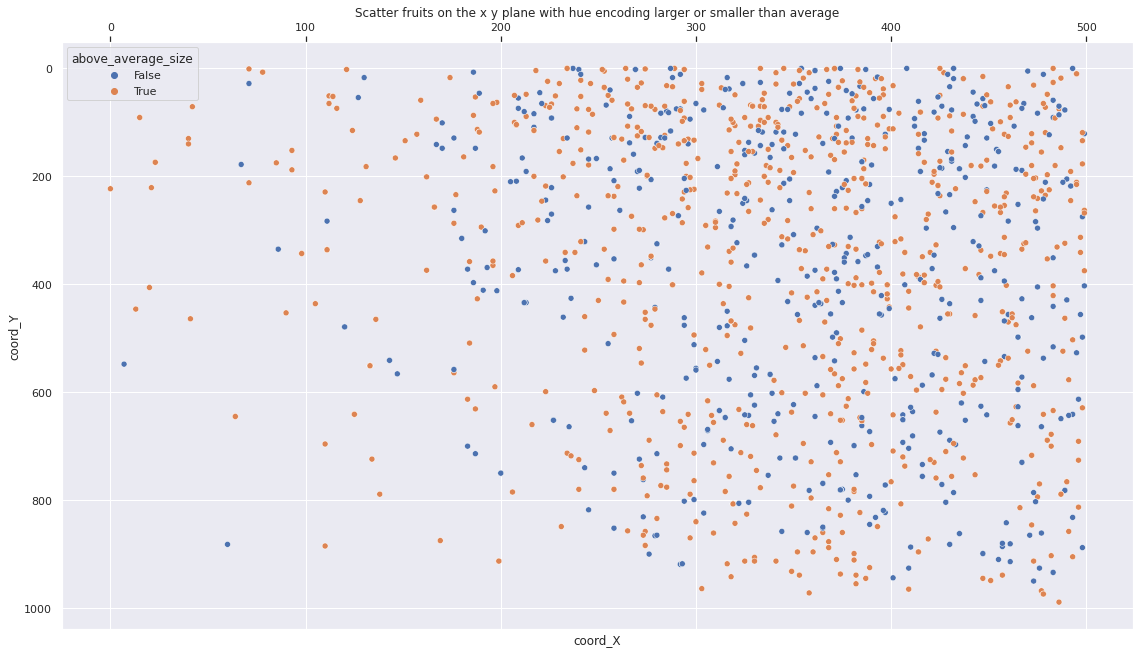

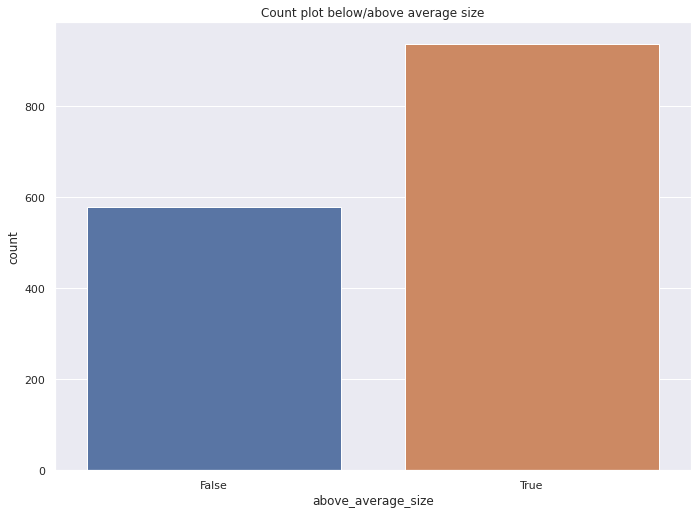

In [13]:
mean_fruit_size = df["caliber_in_mm"].mean()
df["above_average_size"] = df.apply(lambda x: True if x["caliber_in_mm"] > mean_fruit_size else False, axis=1)

df_only_left = df[df["coord_X"] < 500]
fig, ax = plt.subplots(figsize=figure_size);
sns.scatterplot(data=df_only_left, x="coord_X", y="coord_Y", hue="above_average_size");
title = "Scatter fruits on the x y plane with hue encoding larger or smaller than average"
plt.title(title);

ax = plt.gca()  # get the axis
ax.set_ylim(ax.get_ylim()[::-1])  # invert the axis
ax.xaxis.tick_top()


fig, ax = plt.subplots(figsize=(11.4, 8.24));
sns.countplot(data=df_only_left, x="above_average_size");
title = "Count plot below/above average size"
plt.title(title);

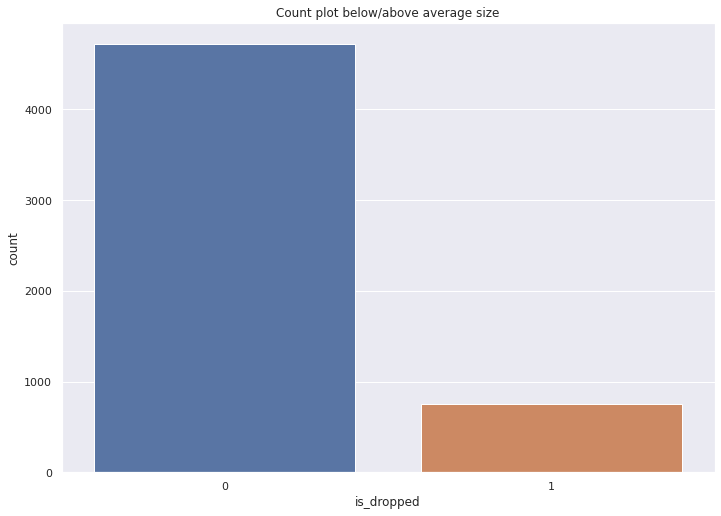

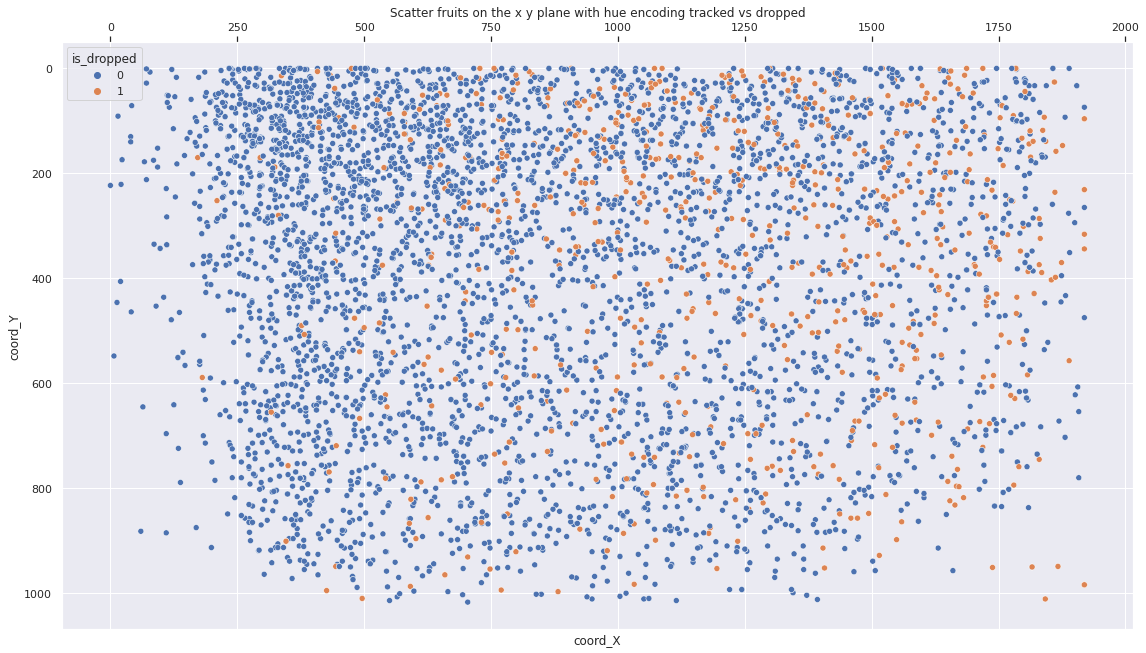

In [14]:
df_all = pd.read_csv(path_to_csv)

sns.countplot(data=df_all, x="is_dropped");
title = "Count plot below/above average size"
plt.title(title);

fig, ax = plt.subplots(figsize=figure_size);
sns.scatterplot(data=df_all, x="coord_X", y="coord_Y", hue="is_dropped");
title = "Scatter fruits on the x y plane with hue encoding tracked vs dropped"
plt.title(title);

ax = plt.gca()  # get the axis
ax.set_ylim(ax.get_ylim()[::-1])  # invert the axis
ax.xaxis.tick_top()

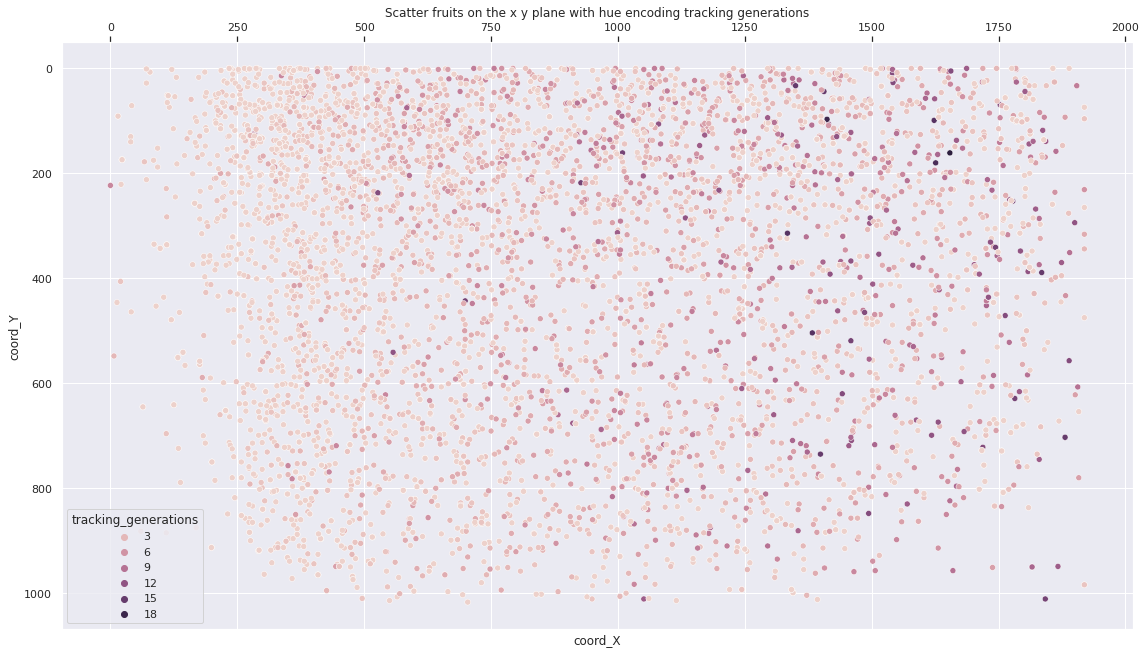

In [15]:
fig, ax = plt.subplots(figsize=figure_size);
sns.scatterplot(data=df_all, x="coord_X", y="coord_Y", hue="tracking_generations");
title = "Scatter fruits on the x y plane with hue encoding tracking generations"
plt.title(title);

ax = plt.gca()  # get the axis
ax.set_ylim(ax.get_ylim()[::-1])  # invert the axis
ax.xaxis.tick_top()

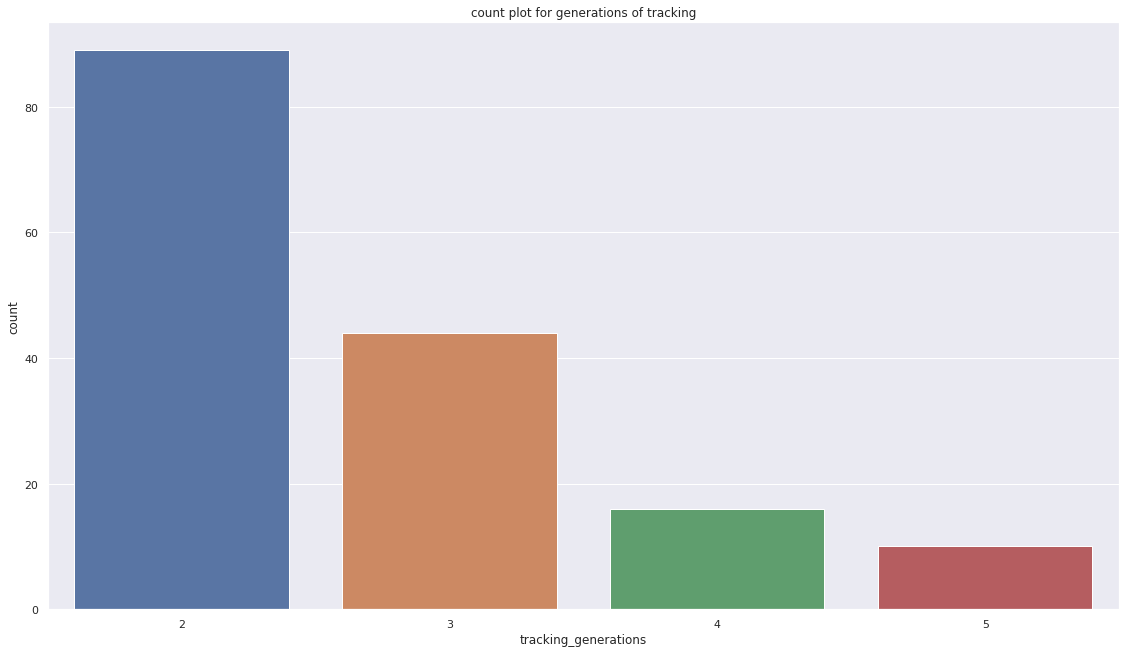

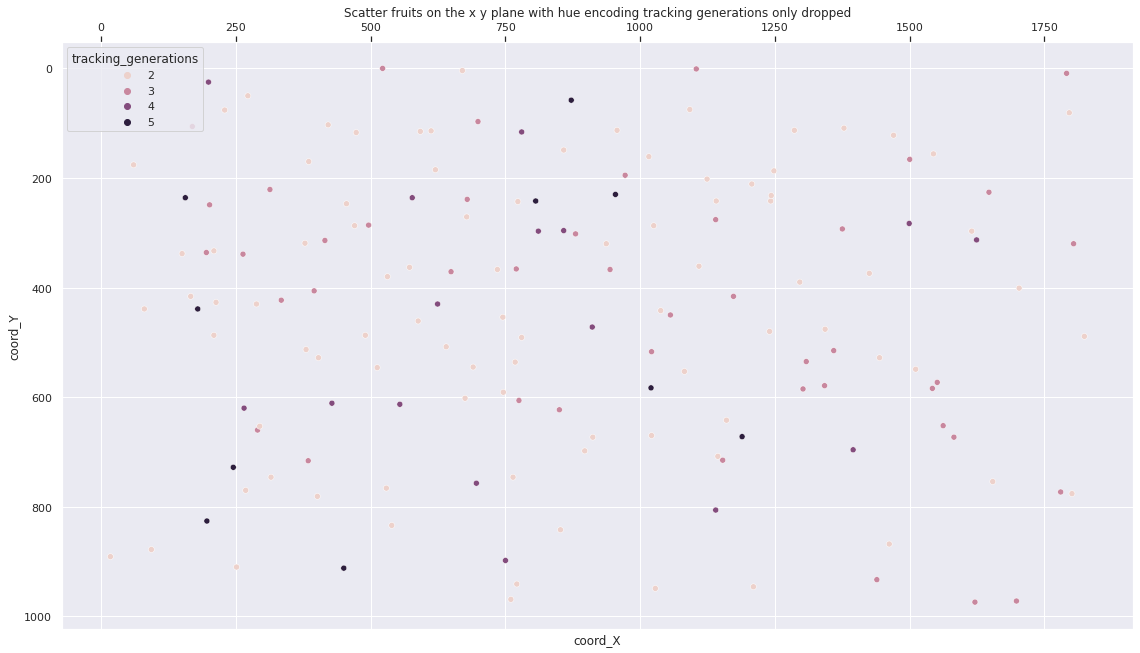

In [7]:
fig, ax = plt.subplots(figsize=figure_size);
sns.countplot(data=df, x="tracking_generations");
title = "count plot for generations of tracking"
plt.title(title);

fig, ax = plt.subplots(figsize=figure_size);
sns.scatterplot(data=df, x="coord_X", y="coord_Y", hue="tracking_generations");
title = "Scatter fruits on the x y plane with hue encoding tracking generations only dropped"
plt.title(title);

ax = plt.gca()  # get the axis
ax.set_ylim(ax.get_ylim()[::-1])  # invert the axis
ax.xaxis.tick_top()

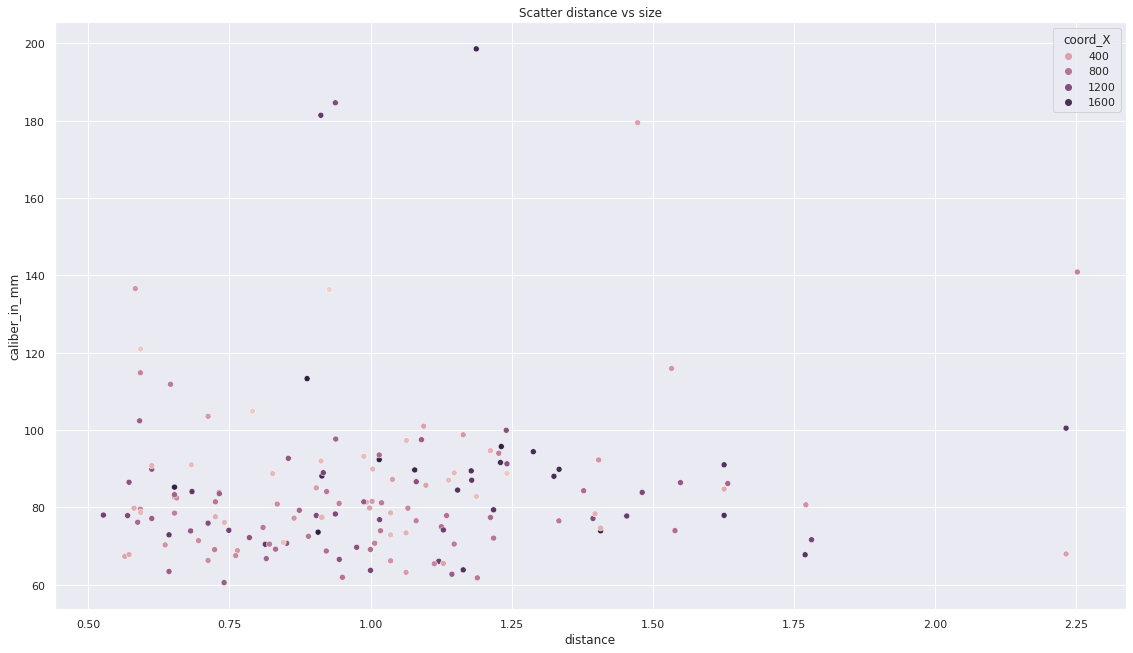

In [6]:
# df_without_ones = df[df["tracking_generations"] > 1]
fig, ax = plt.subplots(figsize=figure_size);
sns.scatterplot(data=df, x="distance", y="caliber_in_mm", hue="coord_X");
title = "Scatter distance vs size"
plt.title(title);

# ax = plt.gca()  # get the axis
# ax.set_ylim(ax.get_ylim()[::-1])  # invert the axis
# ax.xaxis.tick_top()